In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#맑은 고딕 적용
matplotlib.rc('font', family = 'Malgun Gothic')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#분류 NN
from sklearn.neural_network import MLPClassifier

# 분류 knn
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# 계층형 군집 분석, 계층 구조나무 , cluster
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# kmeans 군진분석, DBSCAN 분석
from sklearn.cluster import KMeans, DBSCAN

In [61]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/IRIS.CSV")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
df_raw_y = df_raw["SPECIES"]
df_raw_x = df_raw.drop(["SPECIES"], axis=1, inplace = False)

In [63]:
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
df_raw_y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: SPECIES, Length: 150, dtype: object

In [65]:
df_raw.isnull().sum(axis = 0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [66]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw_x)
df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [68]:
# 연결 : ward 거리계산 : Euclidean
Z_ward = linkage(df_raw_scaled ,method= "ward", metric = 'euclidean')

Z_average = linkage(df_raw_scaled, method= "average", metric = 'euclidean')

Z_Minkowski = linkage(df_raw_scaled, method ="average", metric = 'Minkowski')

In [47]:
Z_ward

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.31632184e-01, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 1.33836265e-01, 2.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 1.33836265e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.90000000e+01, 4.60000000e+01, 1.43378956e-01, 2.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.66143388e-01, 2.00000000e+00],
       [1.20000000e+02, 1.43000000e+02, 1.66143388e-01, 2.00000000e+00],
       [1.10000000e+01, 2.40000000e+01, 1.70512281e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.72216546e

Text(0, 0.5, 'sample index')

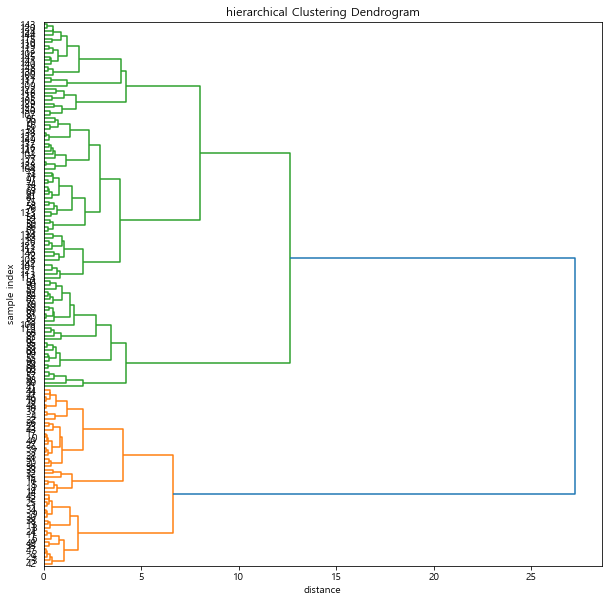

In [69]:
#덴드로그램 - Z_ward
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation = 'right')
plt.title('hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

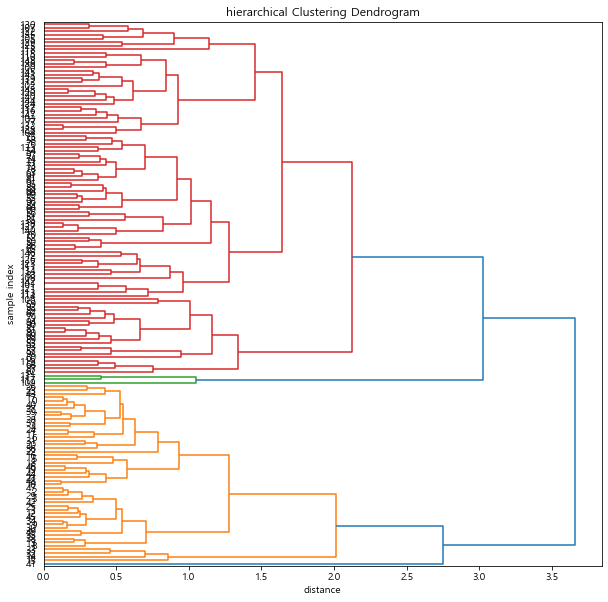

In [70]:
#덴드로그램 - Z__averade
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

dendrogram(Z_average, leaf_font_size=10, orientation = 'right')
plt.title('hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

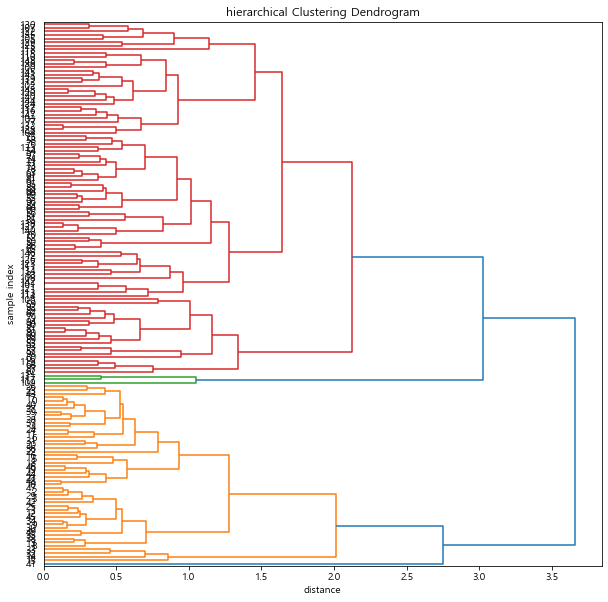

In [71]:
#덴드로그램 - Z__averade
plt.figure(figsize=(10,10))
ax = plt.subplot(111)

dendrogram(Z_Minkowski, leaf_font_size=10, orientation = 'right')
plt.title('hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [72]:
cluster_hierarchical = fcluster(Z = Z_ward, t =5, criterion = "distance")
df_raw_x["ClusterHierarchical"] = cluster_hierarchical
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,ClusterHierarchical
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,2


In [73]:
ds_summary_hc = df_raw_x.groupby("ClusterHierarchical").agg(["min", "mean", "max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc

,ClusterHierarchical,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,4.720000,5.0,2.9,3.140000,3.4,1.1,1.440000,1.9,0.1,0.195000,0.3
1,2,4.6,5.220690,5.8,3.3,3.665517,4.4,1.0,1.482759,1.9,0.1,0.279310,0.6
2,3,4.5,5.530000,6.3,2.0,2.566667,3.0,1.3,3.930000,5.0,0.3,1.206667,1.7
3,4,5.6,6.273333,7.0,2.5,2.893333,3.4,4.0,4.915556,5.8,1.2,1.671111,2.4
4,5,6.2,7.019231,7.9,2.6,3.165385,3.8,5.1,5.876923,6.9,1.6,2.173077,2.5


In [74]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error= []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster" : cluster_range , "Error" : clus_error})
ds_error

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,NumberofCluster,Error
0,1,934.143933
1,2,222.932371
2,3,116.068758
3,4,75.709577
4,5,57.302077
5,6,48.309824
6,7,40.549576
7,8,35.837452
8,9,33.295475
9,10,29.548430


Text(0, 0.5, 'Sum of squared distance')

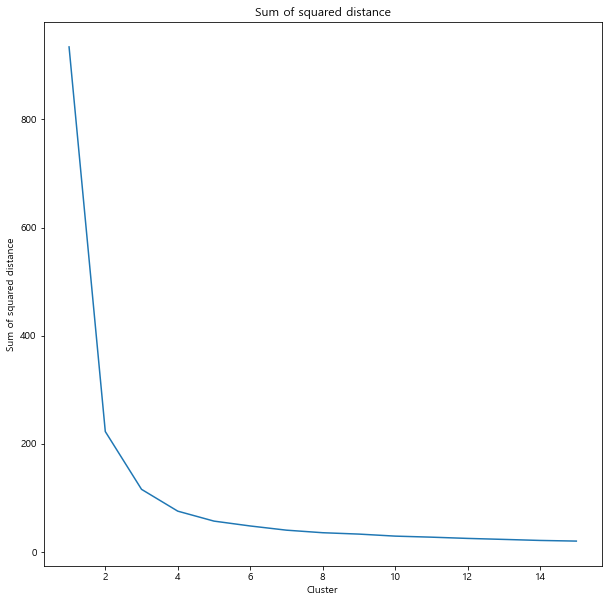

In [75]:
plt.figure(figsize = (10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Cluster")
plt.ylabel("Sum of squared distance")

In [76]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw_x["ClusterKmeans"] = cluster_kmeans
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,ClusterHierarchical,ClusterKmeans
0,5.1,3.5,1.4,0.2,2,5
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,2,5


In [77]:
ds_summary_km = df_raw_x.drop("ClusterHierarchical", axis=1, inplace= False).groupby("ClusterKmeans").agg(["min", "mean", "max"])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,4.720,5.0,2.9,3.140,3.4,1.1,1.440,1.9,0.1,0.195,0.3
1,2,5.6,6.273,7.0,2.5,2.893,3.4,4.0,4.916,5.8,1.2,1.671,2.4
2,3,4.9,5.566,6.3,2.0,2.576,3.0,3.0,4.021,5.0,1.0,1.238,1.7
3,4,6.2,7.019,7.9,2.6,3.165,3.8,5.1,5.877,6.9,1.6,2.173,2.5
4,5,4.5,5.197,5.8,2.3,3.620,4.4,1.0,1.477,1.9,0.1,0.280,0.6


In [ ]:
X = df_raw_x['SEPAL_LENGTH']
Y = df_raw_x['PETAL_LENGTH']

MARKERS=['o','v','^','s','<','>','p','D']

para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2, 3, 4, 5]
fig, axes = plt.subplot(len(para_eps), len(para_min_sample), figsize = (15,15))
fig.tight_layout(w_pad = 1, h_pad = 3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples= min_sample, eps = eps)
        clusters = dbscan.fit_predict(df_raw_scaled)
        clusters = clusters +1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)):
            axes[i,j].scatter(X[clusters ==clus], Y[clusters==clus], marker = markers[n_clus], s = 100)
            axes[i,j].set_title('eps =' + str(eps) + ', min_sample =' + str(min_sample) + '\n # of cluser = '+str(max(clusters)),
                                fontsize =15)

In [78]:
dbscan = DBSCAN(eps = 1.4, min_samples =2).fit(df_raw_x)

cluster_dbscan = dbscan.labels_

for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
df_raw_x["ClusterDBScan"] = cluster_dbscan
df_raw_x

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,5.1,3.5,1.4,0.2,2,5,1
1,4.9,3.0,1.4,0.2,1,1,2
2,4.7,3.2,1.3,0.2,1,1,2
3,4.6,3.1,1.5,0.2,1,1,2
4,5.0,3.6,1.4,0.2,2,5,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,5,4,5
146,6.3,2.5,5.0,1.9,4,2,3
147,6.5,3.0,5.2,2.0,4,2,3
148,6.2,3.4,5.4,2.3,5,4,5


In [81]:
ds_summary_db = df_raw_x.drop(["ClusterHierarchical", "ClusterKmeans"],axis = 1,
                           inplace = False).groupby('ClusterDBScan').agg(['min', 'mean', 'max'])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + '_' + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,0,4.5,4.500,4.5,2.3,2.300,2.3,1.3,1.300,1.3,0.3,0.300,0.3
1,1,4.6,5.221,5.8,3.3,3.666,4.4,1.0,1.483,1.9,0.1,0.279,0.6
2,2,4.3,4.720,5.0,2.9,3.140,3.4,1.1,1.440,1.9,0.1,0.195,0.3
3,3,5.6,6.273,7.0,2.5,2.893,3.4,4.0,4.916,5.8,1.2,1.671,2.4
4,4,4.9,5.566,6.3,2.0,2.576,3.0,3.0,4.021,5.0,1.0,1.238,1.7
5,5,6.2,7.019,7.9,2.6,3.165,3.8,5.1,5.877,6.9,1.6,2.173,2.5
